# Introduction to time series forecasting

## What is Time Series Forecasting?
A time series is a sequence of observations taken sequentially in time.

| Time   | Observation |
|--------|-------------|
| Time #1 | observation |
| Time #2 | observation |
| Time #3 | observation |


These observations can represent various measurable quantities collected over time, such as temperature readings, sales figures, revenue numbers, sensor data, or any variable that changes sequentially. Essentially, any data that is recorded at successive time points to analyze trends, patterns, or forecasts falls under time series data.

Now let's see an example.

2022-01-01    17.496437
2022-01-02    18.474171
2022-01-03    17.131108
2022-01-04    13.397729
2022-01-05     5.696826
Freq: D, dtype: float64


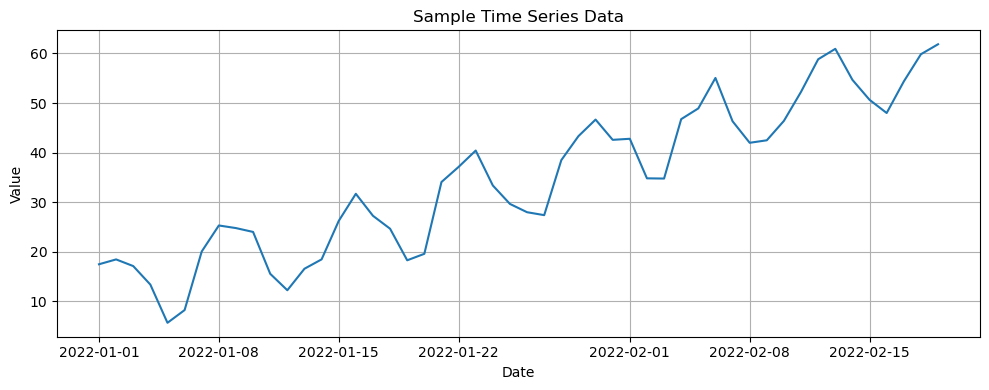

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Generate dates
dates = pd.date_range(start='2022-01-01', periods=50, freq='D')

# Create a time series: Trend + Seasonality + Noise
np.random.seed(42)
trend = np.linspace(10, 60, 50)
seasonality = 8 * np.sin(2 * np.pi * dates.dayofyear / 7)
noise = np.random.normal(0, 2.5, 50)
values = trend + seasonality + noise

# Create pandas Series
series = pd.Series(values, index=dates)

# Display first 5 rows
print(series.head())

# Plot the series
plt.figure(figsize=(10, 4))
plt.plot(series)
plt.title('Sample Time Series Data')
plt.xlabel('Date')
plt.ylabel('Value')
plt.grid(True)
plt.tight_layout()
plt.show()


## Time Series Nomenclature


*   Current time -> `t`
*   `t-n`: A prior or lag time (e.g. `t-1` for the previous time).
*   `t+n`: A future or forecast time (e.g. `t+1` for the next time).





## Importance of Analyzing Historical Data Before Forecasting
- Understanding historical data is a crucial first step before any forecasting.
- Analyzing past data provides insights into trends, patterns, and behaviors, even if forecasting is not the immediate goal.
- When forecasting, exploratory data analysis (EDA) on historical data is essential to ensure model accuracy and reliability.
- EDA uncovers seasonality, trends, anomalies, and structural changes that influence forecasting.
- It also helps identify data quality issues like missing values or outliers that must be addressed beforehand.
- Proper analysis of historical data forms the foundation for selecting forecasting techniques and making informed decisions.
- Skipping this step can lead to poor forecasts and misguided business strategies.

## Components of Time Series
- **Trend**: A trend exists when there is a long-term increase or decrease in the data. It does not have to be linear. Sometimes we will refer to a trend as “changing direction”, when it might go from an increasing trend to a decreasing trend.
- **Seasonality**: A seasonal pattern occurs when a time series is affected by seasonal factors such as the time of the year, the day of the week or the hour of the day. Seasonality is always of a fixed and known period.
- **Noise**: The optional variability in the observations that cannot be explained by the
model.
- **Cyclic**: A cycle occurs when the data exhibit rises and falls that are not of a fixed frequency.



# Decompose Time Series Data
Time series decomposition method involves with references to trend, seasonlity and noise components. There are two types decomposition techniques.



*   Additive
*   Multiplicative





## Additive Time Series Data
$$
Y_t = T_t + S_t + R_t
$$

- T\_t : Trend component  
- S\_t : Seasonal component (fixed amount)  
- R\_t : Residual component (fixed amount)




                 sales       trend  seasonality      noise
date                                                      
2018-01-31  204.967142  200.000000            0   4.967142
2018-02-28  207.091933  208.474576            0  -1.382643
2018-03-31  223.426038  216.949153            0   6.476885
2018-04-30  240.654027  225.423729            0  15.230299
2018-05-31  231.556771  233.898305            0  -2.341534
2018-06-30  240.031512  242.372881            0  -2.341370
2018-07-31  266.639586  250.847458            0  15.792128
2018-08-31  266.996381  259.322034            0   7.674347
2018-09-30  263.101866  267.796610            0  -4.694744
2018-10-31  281.696787  276.271186            0   5.425600
2018-11-30  280.111586  284.745763            0  -4.634177
2018-12-31  308.563041  293.220339           20  -4.657298
2019-01-31  304.114538  301.694915            0   2.419623
2019-02-28  291.036689  310.169492            0 -19.132802
2019-03-31  301.394889  318.644068            0 -17.2491

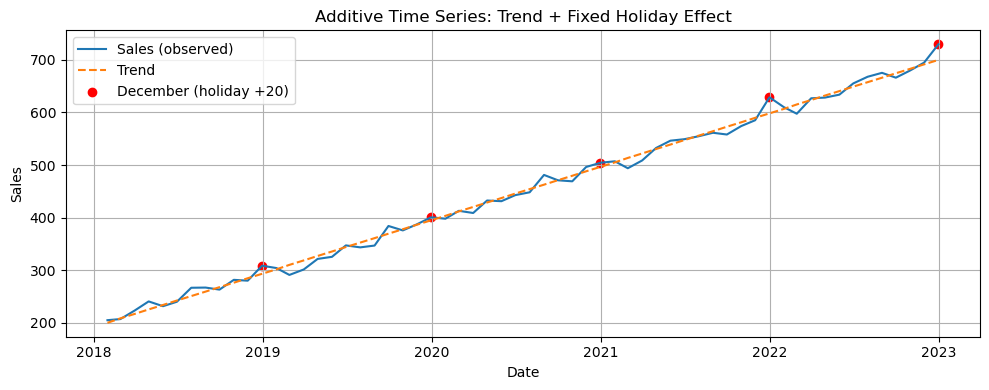

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Reproducibility
np.random.seed(42)

# Parameters
years = 5                   # number of years
periods_per_year = 12       # monthly data
n = years * periods_per_year

# Time index: monthly dates
dates = pd.date_range(start="2018-01-01", periods=n, freq="M")

# Trend: start at 200, increase 100 units per year (~8.33 per month)
trend = 200 + np.linspace(0, 100 * years, n)

# Additive seasonality: +20 units every December, 0 otherwise
seasonality = np.where(dates.month == 12, 20, 0)

# Random noise
noise = np.random.normal(loc=0, scale=10, size=n)

# Additive model: sales = trend + seasonality + noise
sales = trend + seasonality + noise

# Put into a DataFrame for clarity
df = pd.DataFrame({
    "date": dates,
    "sales": sales,
    "trend": trend,
    "seasonality": seasonality,
    "noise": noise
}).set_index("date")

print(df.head(15))  # first 15 months

# Plot full series and highlight December effect
plt.figure(figsize=(10, 4))
plt.plot(df.index, df["sales"], label="Sales (observed)")
plt.plot(df.index, df["trend"], label="Trend", linestyle="--")

# Highlight December points
december_mask = df.index.month == 12
plt.scatter(df.index[december_mask],
            df["sales"][december_mask],
            color="red",
            label="December (holiday +20)")

plt.title("Additive Time Series: Trend + Fixed Holiday Effect")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## Multiplicative Time Series Data


$$
Y_t = T_t \times S_t \times R_t
$$

- \(T_t\): Trend component  
- \(S_t\): Seasonal component (factor/percentage)  
- \(R_t\): Residual component (factor/percentage)

$$ Y_t = S_t \times T_t \times R_t \;\text{is equivalent to}\; \log Y_t = \log S_t + \log T_t + \log R_t. $$


                 sales       trend  seasonality_factor  noise_factor
date                                                                
2018-01-31  102.483571  100.000000                 1.0      1.024836
2018-02-28  107.579807  108.328707                 1.0      0.993087
2018-03-31  121.151435  117.351087                 1.0      1.032384
2018-04-30  136.805667  127.124915                 1.0      1.076151
2018-05-31  136.100481  137.712776                 1.0      0.988292
2018-06-30  147.436013  149.182470                 1.0      0.988293
2018-07-31  174.368067  161.607440                 1.0      1.078961
2018-08-31  181.784884  175.067250                 1.0      1.038372
2018-09-30  185.196342  189.648088                 1.0      0.976526
2018-10-31  211.016588  205.443321                 1.0      1.027128
2018-11-30  217.397318  222.554093                 1.0      0.976829
2018-12-31  353.213748  241.089971                 1.5      0.976714
2019-01-31  264.329307  261.169647

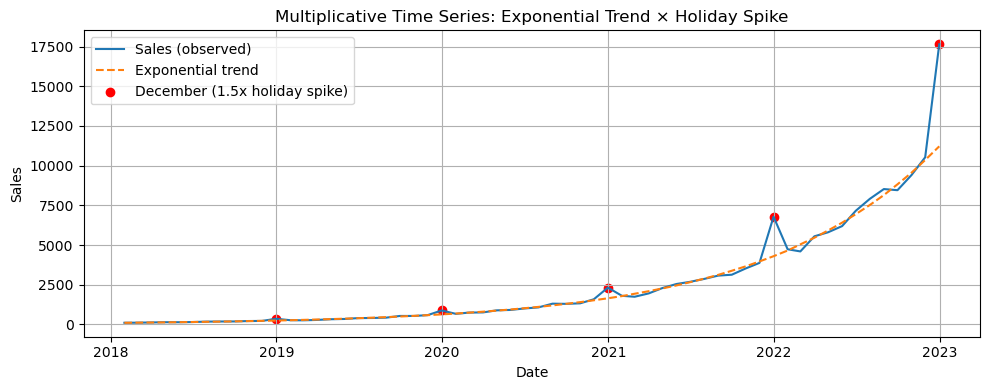

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Reproducibility
np.random.seed(42)

# Parameters
years = 5                    # number of years
periods_per_year = 12        # monthly data
n = years * periods_per_year

# Time index: monthly dates
dates = pd.date_range(start="2018-01-01", periods=n, freq="M")

# Exponential trend: tech company growing over time
# Start level = 100, monthly growth rate ~ 2% (tuned via growth_rate)
growth_rate = 0.08
t = np.arange(n)
trend = 100 * np.exp(growth_rate * t)

# Multiplicative seasonality: 1.5x in December, 1.0 otherwise
seasonality = np.where(dates.month == 12, 1.5, 1.0)

# Multiplicative noise around 1.0 (lognormal style)
noise = np.random.normal(loc=0.0, scale=0.05, size=n)  # small Gaussian noise
noise_factor = 1 + noise                               # centered around 1

# Multiplicative model: sales = trend * seasonality * noise_factor
sales = trend * seasonality * noise_factor

# Put into a DataFrame for clarity
df = pd.DataFrame({
    "date": dates,
    "sales": sales,
    "trend": trend,
    "seasonality_factor": seasonality,
    "noise_factor": noise_factor
}).set_index("date")

print(df.head(15))  # first 15 months

# Plot full series and highlight December (holiday) effect
plt.figure(figsize=(10, 4))
plt.plot(df.index, df["sales"], label="Sales (observed)")
plt.plot(df.index, df["trend"], label="Exponential trend", linestyle="--")

# Highlight December points
december_mask = df.index.month == 12
plt.scatter(df.index[december_mask],
            df["sales"][december_mask],
            color="red",
            label="December (1.5x holiday spike)")

plt.title("Multiplicative Time Series: Exponential Trend × Holiday Spike")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## STL Decomposition

STL decomposes a time series into three components:

**Data = Trend + Seasonal + Remainder**

This helps us understand underlying patterns, handle seasonality robustly, and prepare data for forecasting models

`STL(period=12, seasonal=13, trend=21, robust=True)`

`priod` : After how many steps does the pattern repeat expected?
`seasonal` : When deciding the seasonal shape, how far should I look ahead and behind?
`trend` : Look at a much wider window (21 months around that point) to find the slow overall direction


**STL uses LOESS (Locally Weighted Smoothing)**
LOESS smooths the curve by looking only at a small neighborhood of points around each time step and fitting a tiny regression there.

STL uses LOESS twice: first to smooth the repeating seasonal pattern, and second to extract a smooth long-term trend from the deseasonalized data.

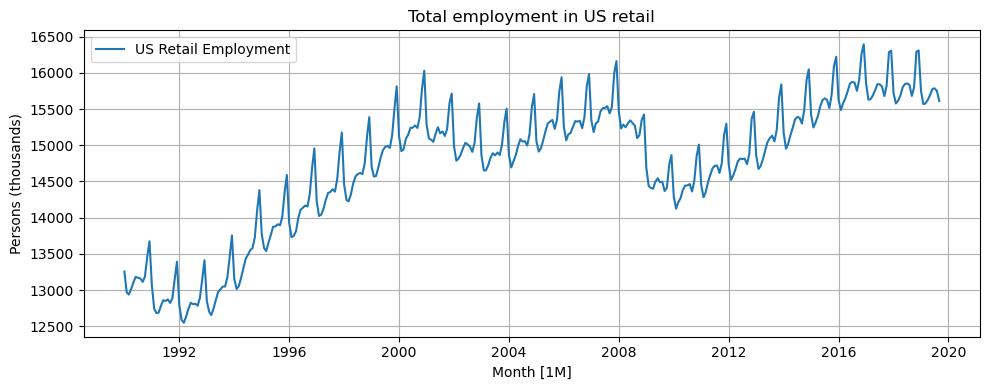

In [11]:
import matplotlib.pyplot as plt

# Your existing code
us_employment = pd.read_csv("us_employment.csv", parse_dates=["ds"])
us_retail_employment = us_employment.query(
    '(unique_id == "Retail Trade") & (ds >= "1990-01-01")'
)

# Matplotlib plot
plt.figure(figsize=(10, 4))
plt.plot(
    us_retail_employment["ds"],
    us_retail_employment["y"],   # adjust column name if different
    label="US Retail Employment"
)

plt.xlabel("Month [1M]")
plt.ylabel("Persons (thousands)")
plt.title("Total employment in US retail")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


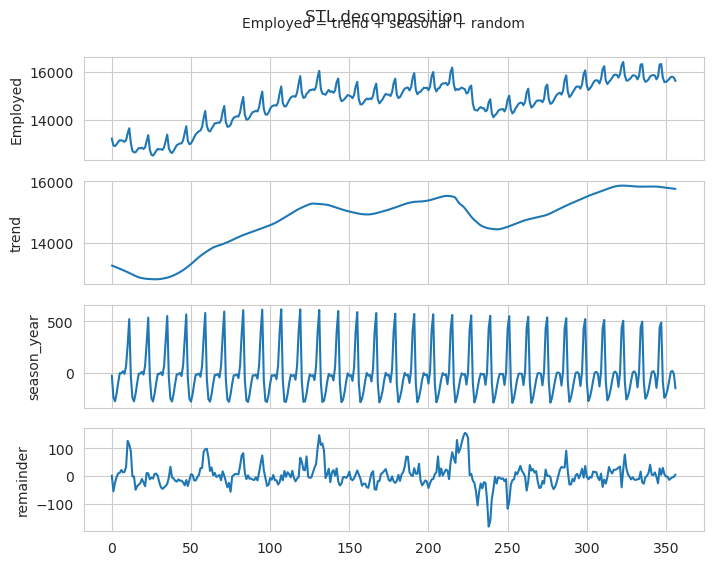

In [17]:
from statsmodels.tsa.seasonal import STL
import seaborn as sns
# sns.set_style("whitegrid")
stl = STL(us_retail_employment["y"], period=12, seasonal=13, trend=21, 
    robust=True)
res_stl = stl.fit()
dcmp = pd.DataFrame({
    "ds": us_retail_employment["ds"],
    "data": us_retail_employment["y"],
    "trend": res_stl.trend,
    "seasonal": res_stl.seasonal,
    "remainder": res_stl.resid
}).reset_index(drop=True)

fig, axes = plt.subplots(nrows=4, ncols=1, sharex=True, figsize=(8, 6))
sns.lineplot(data=dcmp, x=dcmp.index, y="data", ax=axes[0])
sns.lineplot(data=dcmp, x=dcmp.index, y="trend", ax=axes[1])
sns.lineplot(data=dcmp, x=dcmp.index, y="seasonal", ax=axes[2])
sns.lineplot(data=dcmp, x=dcmp.index, y="remainder", ax=axes[3])
axes[0].set_ylabel("Employed")
axes[1].set_ylabel("trend")
axes[2].set_ylabel("season_year")
axes[3].set_ylabel("remainder")
fig.suptitle("STL decomposition")
fig.subplots_adjust(top=0.90)
fig.text(0.5, 0.95, "Employed = trend + seasonal + random", ha="center")
plt.xlabel("")
plt.show()

In [18]:
dcmp

,ds,data,trend,seasonal,remainder
0,1990-01-01,13255.8,13279.820734,-26.681131,2.660398
1,1990-02-01,12966.3,13259.399538,-238.965321,-54.134217
2,1990-03-01,12938.2,13238.645880,-277.000473,-23.445406
3,1990-04-01,13012.3,13217.539139,-201.999909,-3.239229
4,1990-05-01,13108.3,13196.086656,-97.759308,9.972652
...,...,...,...,...,...
352,2019-05-01,15691.6,15783.297423,-78.640209,-13.057214
353,2019-06-01,15775.5,15776.790445,6.660090,-7.950535
354,2019-07-01,15785.9,15770.193517,19.420260,-3.713777
355,2019-08-01,15749.5,15763.523114,-11.761040,-2.262074


# ARIMA (AutoRegressive Integrated Moving Average)

Before we learn ARIMA, there are two important concepts that we should learn. 
1. Stationarity
2. Differencing and Random walk model
4. Autoregressive 
5. Moving Average

## Stationarity 
A stationary time series is one whose statistical properties do not depend on the time at which the series is observed. Thus, **time series with trends, or with seasonality, are not stationary** — the trend and seasonality will affect the value of the time series at different times.

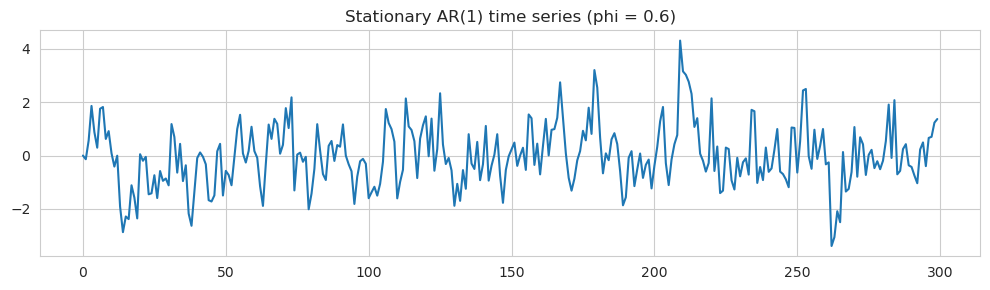

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(42)

n = 300
phi = 0.6  # |phi| < 1 -> stationary AR(1)
sigma = 1.0

eps = np.random.normal(0, sigma, n)
x = np.zeros(n)
for t in range(1, n):
    x[t] = phi * x[t-1] + eps[t]

stationary_series = pd.Series(x)

plt.figure(figsize=(10, 3))
plt.plot(stationary_series)
plt.title("Stationary AR(1) time series (phi = 0.6)")
plt.grid(True)
plt.tight_layout()
plt.show()


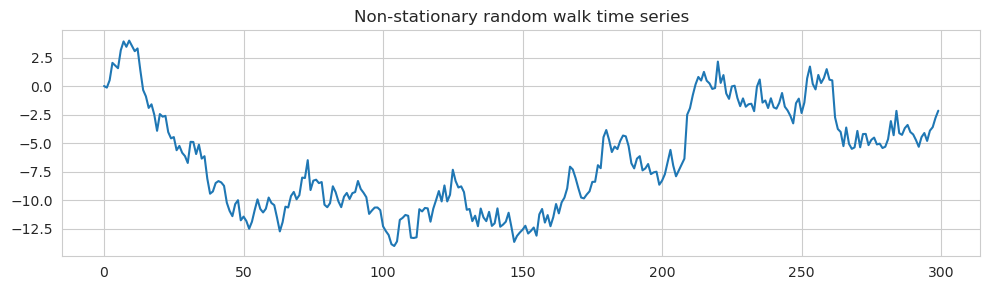

In [28]:
np.random.seed(42)

n = 300
sigma = 1.0

eps = np.random.normal(0, sigma, n)
y = np.zeros(n)
for t in range(1, n):
    y[t] = y[t-1] + eps[t]   # random walk

nonstationary_series = pd.Series(y)

plt.figure(figsize=(10, 3))
plt.plot(nonstationary_series)
plt.title("Non-stationary random walk time series")
plt.grid(True)
plt.tight_layout()
plt.show()


## Differencing and the Random Walk Model

1. ARIMA models need stationary time series data because their mathematical structure assumes that the **relationship between current values and past values (and past errors) does not change over time.** 
2. If the data is not stationary then there is a way to convert non-stationary data to stationary that is nothing but **differencing.** 

The **differenced series** measures the change between consecutive observations in the original time series:
$$
[
y_t' = y_t - y_{t-1}
]
$$
The differenced series will contain only **\(T - 1\)** values because we cannot compute a difference for the first observation \(y_1\).

---
### Optional 
#### When the differenced series is white noise

If the differenced series behaves like white noise, then:
$$
[
y_t - y_{t-1} = \varepsilon_t
]
$$
where $$\varepsilon_t$$ is white noise.

#### Rearranging gives us the **random walk model**:
$$
[
y_t = y_{t-1} + \varepsilon_t
]
$$

---

#### Properties of a Random Walk

Random walk models are widely used for **non-stationary time series**, especially in financial and economic data.

Typical characteristics include:

- Long periods of apparent upward or downward trends  
- Sudden and unpredictable changes in direction  

---

#### Forecasting with a Random Walk

For a random walk:

- The **best forecast** for all future values is simply the **last observed value**
- Future movements are unpredictable and equally likely to move up or down

Thus, forecasts are:
$$
[
\hat{y}_{t+h} = y_t
]
$$
for all forecast horizons \(h\).


#### Second-Order Differencing

Sometimes, first-order differencing is not enough to make a series stationary.  
In such cases, we apply **second-order differencing**, which means differencing the already differenced series:
$$
[
y_t'' = y_t' - y_{t-1}'
]
$$
Expanding the expressions:
$$
[
y_t'' = (y_t - y_{t-1}) - (y_{t-1} - y_{t-2})
]
$$
Simplifying:
$$
[
y_t'' = y_t - 2y_{t-1} + y_{t-2}
]
$$
In this case, the second-order differenced series \(y_t''\) will contain **\(T - 2\)** values.

---

#### Interpretation

Second-order differencing models the **“change in the changes”** of the original data.  
For most real-world time series, it is rarely necessary to go beyond second-order differencing — almost all series become stationary after one or two differences.



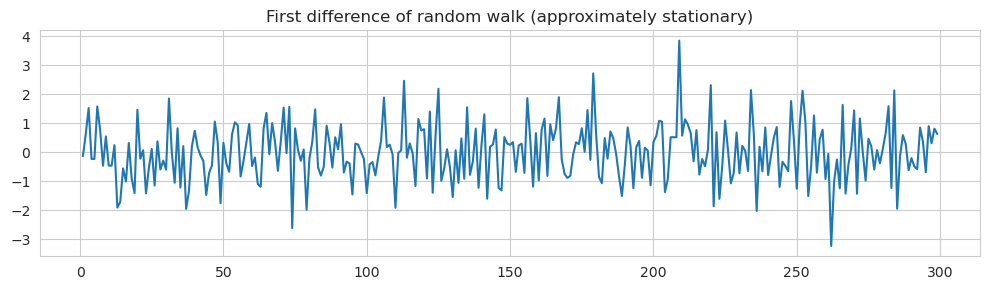

In [26]:
diff_series = nonstationary_series.diff().dropna()

plt.figure(figsize=(10, 3))
plt.plot(diff_series)
plt.title("First difference of random walk (approximately stationary)")
plt.grid(True)
plt.tight_layout()
plt.show()


## Autoregressive (AR) Models

In multiple regression, we forecast a variable using a **linear combination of predictors**.

In an **autoregression** model, we forecast the variable of interest using a **linear combination of its own past values**.  
The term *autoregression* literally means “regression of the variable against itself.”

---

#### AR(p) Model Definition

An autoregressive model of order \(p\), denoted as **AR(p)**, is written as:
$$
[
y_t = c + \phi_1 y_{t-1} + \phi_2 y_{t-2} + \cdots + \phi_p y_{t-p} + \varepsilon_t,
]
$$
where:

- \(y_t\): current value  
- \(y_{t-1}, y_{t-2}, ..., y_{t-p}\): lagged values  
- \(c\): constant term  
- \(\phi_1, \phi_2, ..., \phi_p\): autoregressive coefficients  
- \(\varepsilon_t\): white noise

---

#### Interpretation

This model is similar to multiple regression, but the **predictors are past values of the same series**.  
Therefore, the AR(p) model captures how previous observations influence the current observation.



## Moving Average (MA) Model

Rather than using past values of the variable itself (as in autoregression), a **moving average model** uses **past forecast errors** in a regression-like structure.

An MA(q) model is written as:
$$
[
y_t = c + \varepsilon_t + \theta_1 \varepsilon_{t-1} + \theta_2 \varepsilon_{t-2} + ... + \theta_q \varepsilon_{t-q}
]
$$
where:

- $$(\varepsilon_t)$$ is white noise  
- $$(c)$$ is a constant  
- $$(\theta_1, \theta_2, ..., \theta_q)$$ are the moving average coefficients  

---

#### Interpretation

This is called an **MA(q)** model — a moving average model of order $$(q)$$  
Instead of regressing on past values of $$(y_t)$$, the model regresses on **past shocks** or **past error terms**.

However, note:

> We do **not** observe \(\varepsilon_t\) directly, so an MA model is not a regression in the usual sense.  
> The errors must be inferred during model estimation.



## ARIMA Models

If we combine differencing with autoregression and a moving average model, we obtain a **non-seasonal ARIMA model**.  
ARIMA stands for **AutoRegressive Integrated Moving Average** (where “integration” is the reverse of differencing).

The full model can be written as:
$$
[
y_t' = c + \phi_1 y_{t-1}' + ... + \phi_p y_{t-p}' + \theta_1 \varepsilon_{t-1} + ... + \theta_q \varepsilon_{t-q} + \varepsilon_t
]
$$

where:

- $$(y_t')$$ is the differenced series (it may have been differenced more than once).

The “predictors” on the right-hand side include both:

- lagged values of $$(y_t)$$, and  
- lagged errors $$(\varepsilon_t)$$.

We call this an **ARIMA(p, d, q)** model, where:

- **p** = order of the autoregressive part  
- **d** = degree of first differencing involved  
- **q** = order of the moving average part  

The same **stationarity** and **invertibility** conditions used for AR and MA models also apply to an ARIMA model.

It is mainly used for forecasting **univariate time series** recorded at regular intervals.


### Special Cases of ARIMA Models

| Special Case              | ARIMA(p, d, q) Form                     |
|---------------------------|------------------------------------------|
| White noise               | ARIMA(0,0,0) with no constant            |
| Random walk               | ARIMA(0,1,0) with no constant            |
| Random walk with drift    | ARIMA(0,1,0) with a constant             |
| Autoregression            | ARIMA(p,0,0)                              |
| Moving average            | ARIMA(0,0,q)                              |



## Forecasting

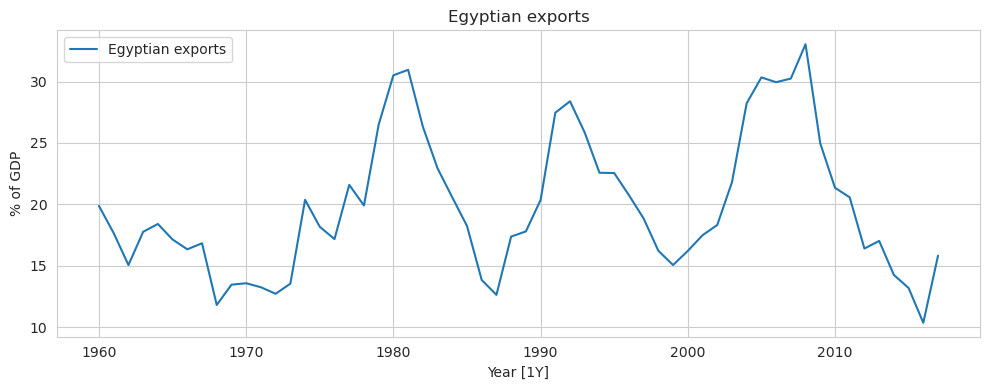

In [33]:
import matplotlib.pyplot as plt

global_economy = pd.read_csv("global_economy.csv", parse_dates=[2])
global_economy = global_economy.rename(columns={"Exports": "y"})
egyptian_economy = (
    global_economy.query("Code == 'EGY'").reset_index(drop=True)
)


plt.figure(figsize=(10, 4))
plt.plot(egyptian_economy["ds"], egyptian_economy["y"], label="Egyptian exports")

plt.xlabel("Year [1Y]")
plt.ylabel("% of GDP")
plt.title("Egyptian exports")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()



In [38]:
from statsforecast import StatsForecast
from statsforecast.models import AutoARIMA
from statsforecast.arima import ARIMASummary
from copy import deepcopy

models = [AutoARIMA(allowmean=True)]
sf = StatsForecast(models=models, freq="A", n_jobs=-1)
sf.fit(df=egyptian_economy[["ds", "y", "unique_id"]])

print(ARIMASummary(sf.fitted_[0, 0].model_))
coefs = deepcopy(sf.fitted_[0, 0].model_['coef'])
coefs["mean"] = coefs.pop("intercept")
coefs = {k: round(v, 3) for k, v in coefs.items()}
print(f"Coefficients: {coefs}")
print(f"sigma^2     : {sf.fitted_[0, 0].model_['sigma2']:.2f}")

ARIMA(2,0,1) with non-zero mean
Coefficients: {'ar1': 1.676, 'ar2': -0.803, 'ma1': -0.69, 'mean': 20.179}
sigma^2     : 8.05


This is an ARIMA(2,0,1) model:
$$
[
y_t = c + 1.68\,y_{t-1} - 0.80\,y_{t-2} - 0.69\,\varepsilon_{t-1} + \varepsilon_t
]
$$

$$
[
c = \text{mean} \times (1 - \phi_1 - \phi_2)
]
$$
$$
[
c = 20.179 \times (1 - 1.68 + 0.8) \approx 2.43
]
$$
This is the intercept in the ARIMA equation.

The model assumes the error term $$(\varepsilon_t)$$ is white noise with variance $$(\sigma^2)$$.

From your output:

- **sigma²:** 8.05  

So the standard deviation is:
$$
[
\sqrt{8.05} \approx 2.837
]
$$


In [39]:
levels = [80, 95]
forecasts = sf.predict(h=10, level=levels)

/home/mry/miniconda3/envs/myenv/lib/python3.8/site-packages/statsforecast/core.py:494: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


Index(['ds', 'AutoARIMA', 'AutoARIMA-lo-95', 'AutoARIMA-lo-80',
       'AutoARIMA-hi-80', 'AutoARIMA-hi-95'],
      dtype='object')


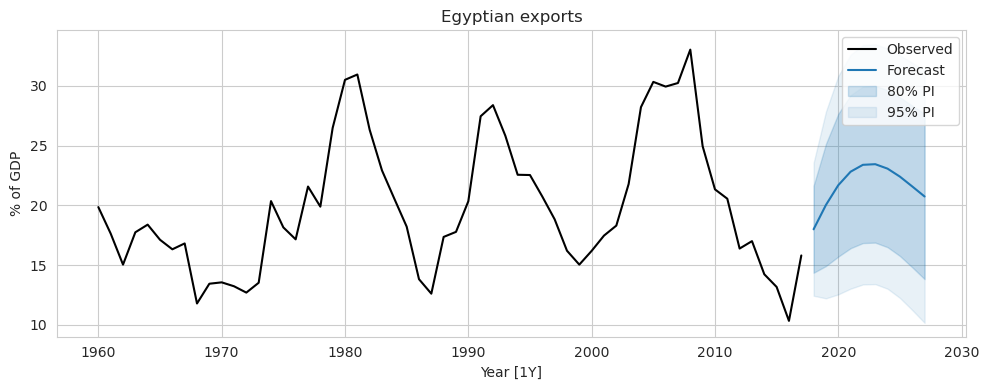

In [40]:
import matplotlib.pyplot as plt

# Optional: check columns to confirm names
print(forecasts.columns)
# Expected something like:
# Index(['unique_id', 'ds', 'AutoARIMA', 'AutoARIMA-lo-80', 'AutoARIMA-hi-80',
#        'AutoARIMA-lo-95', 'AutoARIMA-hi-95'],
#       dtype='object')

model_col = "AutoARIMA"  # change if your model column has a different name

plt.figure(figsize=(10, 4))

# 1. Historical data
plt.plot(
    egyptian_economy["ds"],
    egyptian_economy["y"],
    label="Observed",
    color="black",
)

# 2. Point forecasts
plt.plot(
    forecasts["ds"],
    forecasts[model_col],
    label="Forecast",
    color="tab:blue",
)

# 3. 80% prediction interval
plt.fill_between(
    forecasts["ds"],
    forecasts[f"{model_col}-lo-80"],
    forecasts[f"{model_col}-hi-80"],
    color="tab:blue",
    alpha=0.2,
    label="80% PI",
)

# 4. 95% prediction interval
plt.fill_between(
    forecasts["ds"],
    forecasts[f"{model_col}-lo-95"],
    forecasts[f"{model_col}-hi-95"],
    color="tab:blue",
    alpha=0.1,
    label="95% PI",
)

plt.xlabel("Year [1Y]")
plt.ylabel("% of GDP")
plt.title("Egyptian exports")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
